# <font size = 8 color ='336EFF'>Golden Section</font>

<img src=https://www.forex.academy/wp-content/uploads/2020/04/golden-ratio_598339889.jpg width="300">

Import Libraries

In [1]:
# Golden section search of a one-dimensional objective function
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

# Define Objective Function

In [2]:
# objective function
def objective(x):
    return (x[0] - 5)*(x[0] - 2)*(x[0] - 3) + 10# 3 x^2 - 20 x + 31, roots(10/3 +- sqrt(7)/3)

Define auxiliary function for plotting

In [3]:
def plotCurrentSolution(bounds, xl, xh, x1, x2, xhat):
    # sample input range uniformly at 0.1 increments
    inputs = np.arange(bounds[0, 0], bounds[0, 1], 0.1)
    # create a line plot of input vs result
    plt.clf()
    plt.plot(inputs, [objective([x]) for x in inputs], '--')
    # draw a vertical line at the optimal input
    plt.axvline(x=xl, ls='--', color='red')
    plt.axvline(x=xh, ls='--', color='black')
    plt.axvline(x=x1, ls='--', color='blue')
    plt.axvline(x=x2, ls='--', color='purple')
    # plot the sample as black circles
    f_xhat = objective([xhat])
    plt.plot(xhat, objective([xhat]), 'o', color='black')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Solution: {xhat}, Evaluation: {f_xhat}')
    plt.draw()#plt.show()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.pause(0.1)

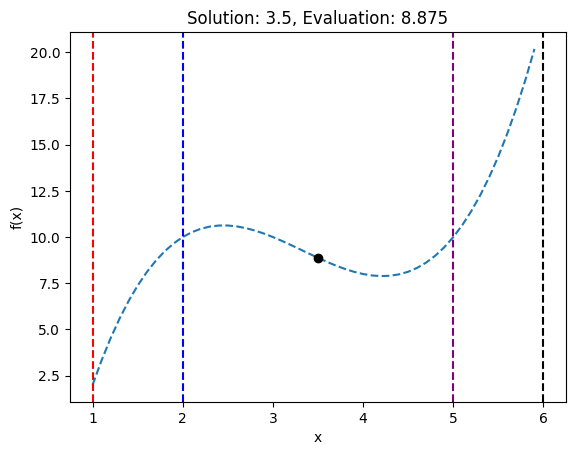

In [4]:
bounds = np.asarray([[1.0, 6.0]])
xl, xh, x1, x2, xhat = bounds[0, 0], bounds[0, 1], bounds[0, 0] + 1, bounds[0, 1]-1, (bounds[0, 0] + bounds[0, 1])/2
plotCurrentSolution(bounds, xl, xh, x1, x2, xhat)

# Define Golden Section function

In [5]:
# Golden Section
phi = 1.6180339 - 1;

In [6]:
# Golden Section search algorithm
def goldensection(f_x, bounds, n_iterations, minErr):
    # generate an initial point
    xl = bounds[:, 0]
    xh = bounds[:, 1]
    # evaluate the solution points
    xhat = xh
    if f_x(xl) < f_x(xh):
        xhat = xl
    err = np.inf
    iter = 0
    while iter<= n_iterations and err > minErr:
        d = phi*(xh - xl)
        x1 = xh - d
        x2 = xl + d

        if f_x(x1) < f_x(x2):
            xl, xh, xhat = xl, x2, x1
        if f_x(x1) > f_x(x2):
            xl, xh, xhat = x1, xh, x2
        if f_x(x1) == f_x(x2):
            xl, xh, xhat = x1, x2, (x1+x2)/2
        err = abs(xh - xl)
        plotCurrentSolution(bounds, xl, xh, x1, x2, xhat)
        iter += 1

    return xhat, iter

Define Main Function

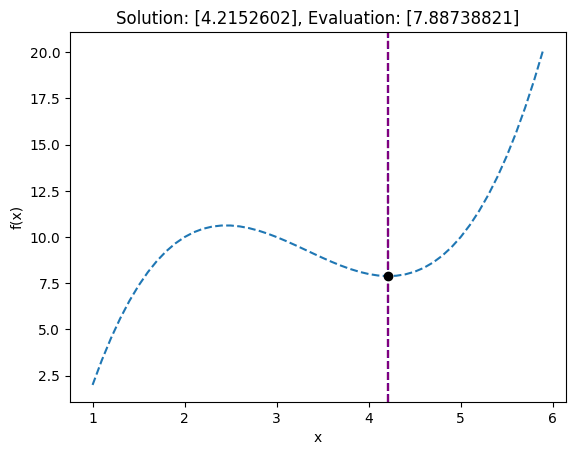

Solution: [4.2152602], Evaluation: [7.88738821]
Number of iterations: 18


In [7]:
# define range for input
bounds = np.asarray([[1, 6]])
# define the maximum number of iterations
n_iterations = 100
# define the maximum step size
minErr = 1e-3
sol, final_iterations = goldensection(objective, bounds, n_iterations, minErr)
f_sol = objective([sol])
print(f'Solution: {sol}, Evaluation: {f_sol}')
print(f'Number of iterations: {final_iterations}')